---
title: "Lab-10: Bootstrap Sampling"
author: "Brian Kwon"
format: 
    html: 
        embed-resources: true
---

In [2]:
library(ISLR)
library(boot)
library(ggplot2)

# Class Examples

## Example 1

From the Notes

In [3]:
alpha=function(X,Y){
  vx=var(X)
  vy=var(Y)
  cxy=cov(X,Y)
  (vy-cxy)/(vx+vy-2*cxy)
}

head(Portfolio) #The Portfolio data set in the ISLR package

alpha(Portfolio$X,Portfolio$Y) #alpha hat

,X,Y
,<dbl>,<dbl>
1,-0.8952509,-0.2349235
2,-1.5624543,-0.8851760
3,-0.4170899,0.2718880
4,1.0443557,-0.7341975
5,-0.3155684,0.8419834
6,-1.7371238,-2.0371910


[1] 0.5758321

[1] -2.432764  2.460336

[1] -2.725281  2.565985

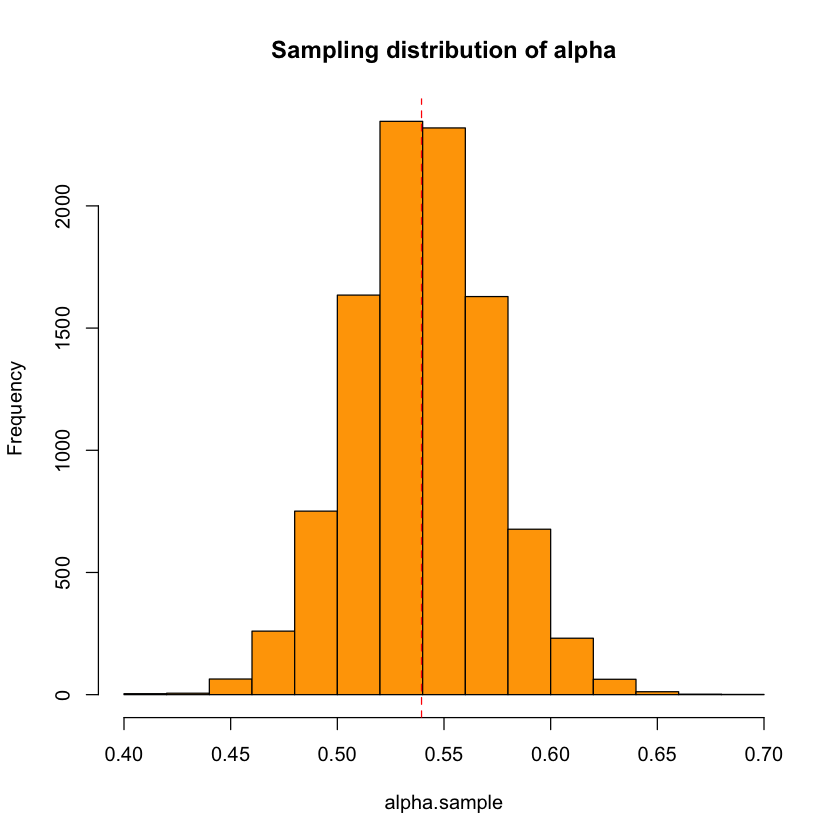

In [4]:
## this is a simulation just to mimic the population

n=100
N <- 10000
alpha.sample <- numeric(N) #creating a numeric object

range(Portfolio$X)
range(Portfolio$Y)


# generating 1000 simulated data sets from the true population. Assumption: 1. Minimum and maximum values of X and Y from the sample Portfolio is the same as that of the Population.
# 2. Also assuming it's coming from a uniform distribution

for (i in 1:N)
{
  x <- runif(n,min(Portfolio$X),max(Portfolio$X)) 
  y <- runif(n,min(Portfolio$Y),max(Portfolio$Y))
  alpha.sample[i] <- alpha(x,y)
}

hist(alpha.sample, main = "Sampling distribution of alpha", col="orange") 
abline(v = mean(alpha.sample), col = "red", lty = 2)

This part is just was only trying to mimic the Population where this Portfolio data came from. 

Assumptions: 
1. Minimum and maximum values of X and Y from the sample Portfolio is the same as that of the Population.
2. Also assuming the population is coming from a uniform distribution

But in truth we only have one sample. So we need to use bootstrap sampling.


a. Let's run the bootstrap

[1] 100   2

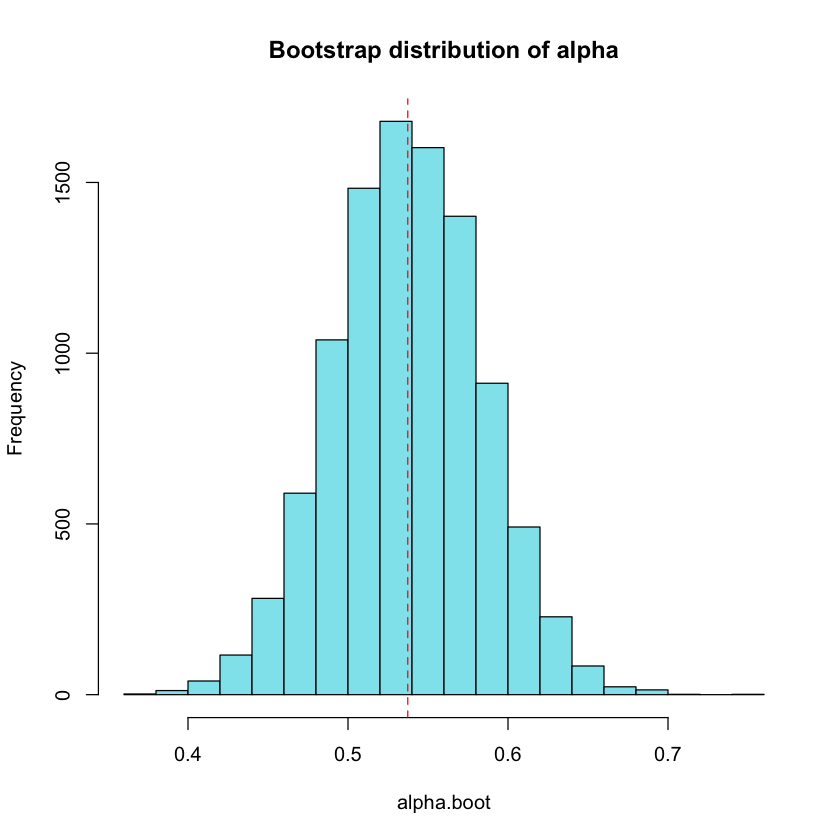

In [5]:
dim(Portfolio)

n=100 
N <- 10000
alpha.boot <- numeric(N) #creating a numeric object

for (i in 1:N)
{
  x <- sample(Portfolio$X, n, replace = TRUE)
  y <- sample(Portfolio$Y, n, replace = TRUE)
  alpha.boot[i] <- alpha(x,y)
}

hist(alpha.boot, main = "Bootstrap distribution of alpha", col="cadetblue2") 
abline(v = mean(alpha.boot), col = "red", lty = 2)

b. What is the standard error of alpha?

In [6]:
mean(alpha.boot)
sd(alpha.boot)

[1] 0.5373596

[1] 0.04584227

Compare;

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.3     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths


No id variables; using all as measure variables



,variable,value
,<fct>,<dbl>
1,alpha.sample,0.5543130
2,alpha.sample,0.5758632
3,alpha.sample,0.6186656
4,alpha.sample,0.5620160
5,alpha.sample,0.5168136
6,alpha.sample,0.5065099


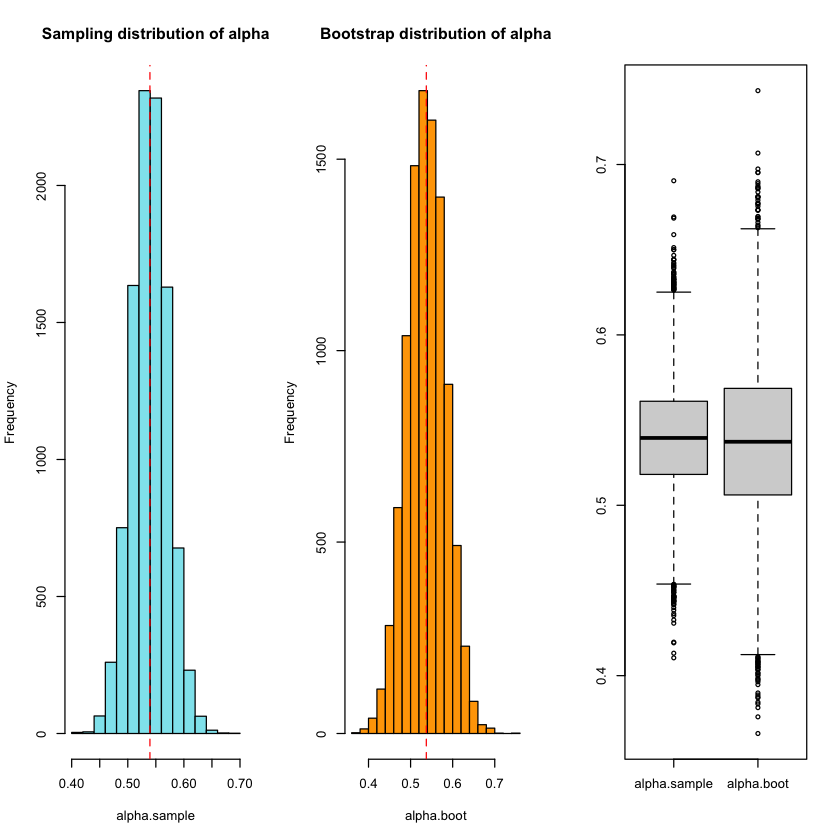

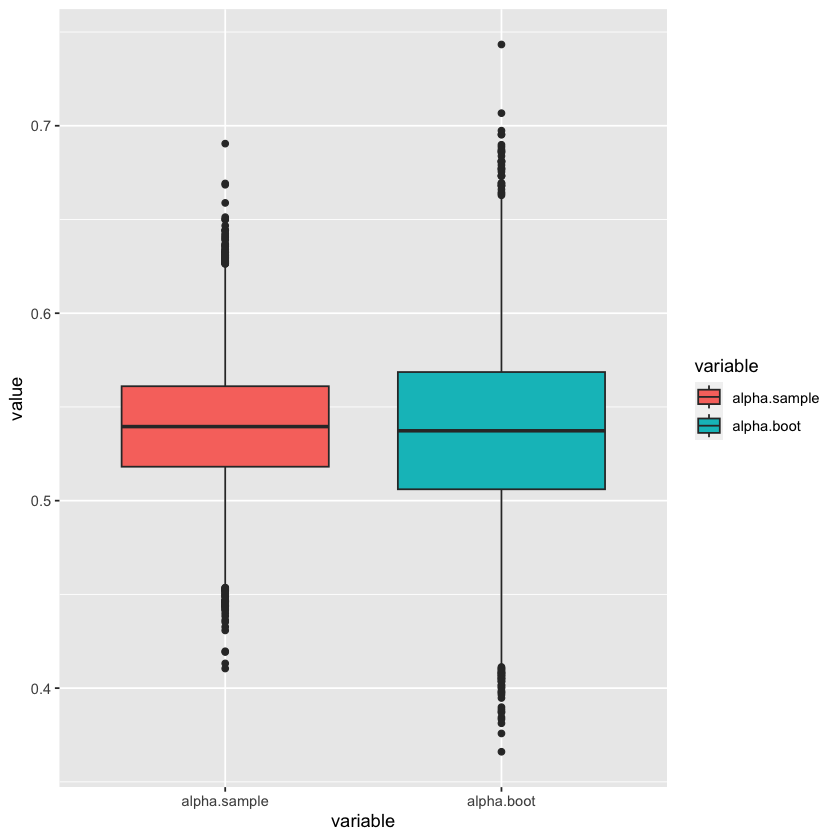

In [7]:
par(mfrow=c(1,3))

alpha <- data.frame(alpha.sample,alpha.boot)

hist(alpha.sample, main = "Sampling distribution of alpha", col="cadetblue2") 
abline(v = mean(alpha.sample), col = "red", lty = 2)

hist(alpha.boot, main = "Bootstrap distribution of alpha", col="orange") 
abline(v = mean(alpha.boot), col = "red", lty = 2)

boxplot(alpha )

#OR

library(tidyverse)
#install.packages("reshape2")                          
library("reshape2")

data_long <- melt(alpha)
head(data_long)

data_long %>% 
  ggplot( aes(x = variable, y = value, fill=variable)) +
  geom_boxplot()

c. _Using the "boot" library_;

First, we must create a function that computes the statistic of interest.
Second, we use the boot() function, which is part of the boot library, to boot() perform the bootstrap by repeatedly sampling observations from the dataset with replacement.

To illustrate the use of the bootstrap on this data, we must first create a function, alpha.fn(), which takes as input the (X, Y ) data as well as a vector indicating which observations should be used to estimate $\alpha$. The function then outputs the estimate for $\alpha$ based on the selected observations.

This function returns, or outputs, an estimate for $\alpha$ based on applying the formula to the observations indexed by the argument index.


In [8]:
#alpha.f=function(data,index){ #index=rows of your data set
 #with(data[index,], (var(Y) - cov(X, Y)) / (var(X) + var(Y) - 2 * cov(X, Y)))
#}
#alpha.f(Portfolio,1:100) 

# this function uses the function "with" - it says using the data in the data frame
#execute the commands.

#OR

alpha.fn <- function(data, index) {
  X <- data$X[index]
  Y <- data$Y[index]
  (var(Y) - cov(X, Y)) / (var(X) + var(Y) - 2 * cov(X, Y))
}

For instance, the following command tells R to estimate $\alpha$ using all 100 observations.

In [9]:
dim(Portfolio)
alpha.fn(Portfolio,1:100) #this gives you the alpha for data index 1 to 100

[1] 100   2

[1] 0.5758321

The next command uses the sample() function to randomly select 100 observations from the range 1 to 100, with replacement. This is equivalent to constructing a new bootstrap data set and recomputing $\hat{\alpha}$ based on the new data set.

In [10]:
#one bootstrap sample

alpha.fn(Portfolio,sample(1:100,100,replace=T)) #if you do this one time, the estimate is high

[1] 0.6414332

We can implement a bootstrap analysis by performing this command many times, recording all of the corresponding estimates for $\alpha$, and computing the resulting standard deviation. However, the boot() function automates this approach. Below we produce R = 1000 bootstrap estimates for $\alpha$.


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.5758321 -0.001596422  0.09376093

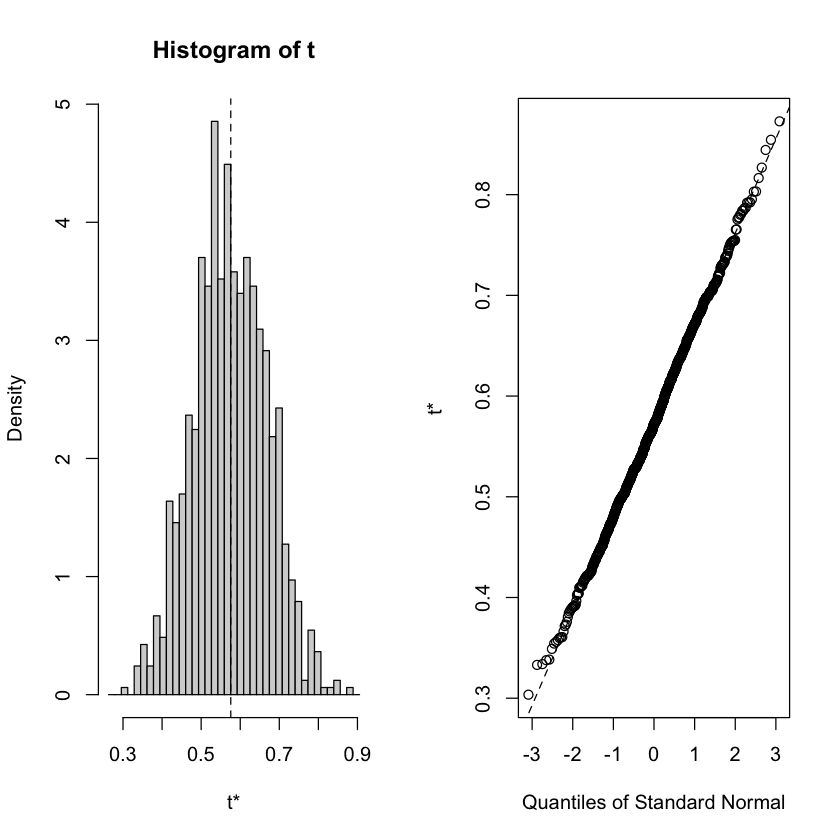

In [11]:
# Let's run the bootstrap
set.seed(1)
## but when you repeat it for many times, estimate get closer to the original

boot.out= boot(Portfolio,alpha.fn,R=1000) #repeat this 1000 times
boot.out

plot(boot.out) #symmetric distribution, looks like gaussian

The final output shows that using the original data, $\hat{\alpha}= 0.5758$, and that
the bootstrap estimate for $SE(\hat{\alpha})$ is 0.093.

## Example 2: 

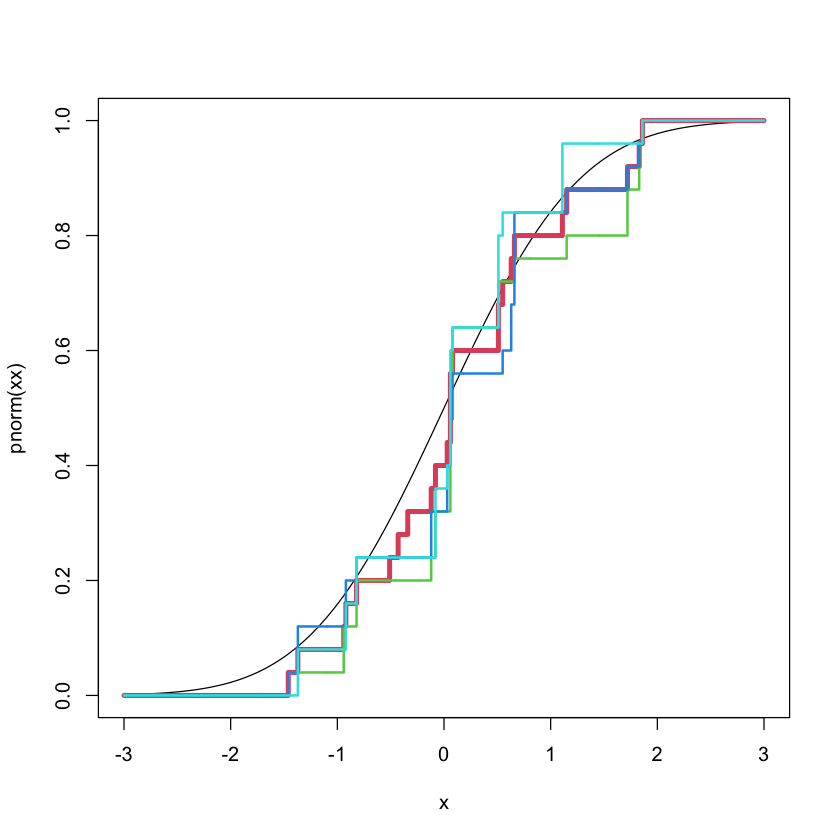

In [12]:
## Let's take a sample of size 25 from a standard normal distribution.
x0 <- rnorm(25)

## I'm going to take 3 bootstrap samples from the original sample
x.boot1 <- sample(x0, 25, replace = T)
x.boot2 <- sample(x0, 25, replace = T)
x.boot3 <- sample(x0, 25, replace = T)

## Let's compare the ecd plots
ecdf.x0 <- ecdf(x0)
ecdf.x.boot1 <- ecdf(x.boot1)
ecdf.x.boot2 <- ecdf(x.boot2)
ecdf.x.boot3 <- ecdf(x.boot3)
xx <- seq(-3,3,by = .01)

#First let's plot the ecdf of the normal distribution (true distribution)
plot(xx,pnorm(xx), type = 'l', xlab = "x")

#ecdf of our original sample
lines(xx,ecdf.x0(xx), type = 's', col = 2, lwd = 4)
## this follows the true distribution but it has few jumps. 


#ecdf of the bootstrap samples
lines(xx,ecdf.x.boot1(xx), type = 's', col = 3, lwd = 2)
lines(xx,ecdf.x.boot2(xx), type = 's', col = 4, lwd = 2)
lines(xx,ecdf.x.boot3(xx), type = 's', col = 5, lwd = 2)

## Example 3: Bangladesh

Arsenic is a naturally occurring element in the ground water of Bangladesh. However, much of this ground water is used for drinking water by rural populations, so arsenic poisoning is a serious health issue.

a.Plot the distribution of arsenic concentrations from 271 wells in Bangladesh.

,Arsenic,Chlorine,Cobalt
,<dbl>,<dbl>,<dbl>
1,2400,6.2,0.42
2,6,116.0,0.45
3,904,14.8,0.63
4,321,35.9,0.68
5,1280,18.9,0.58
6,151,7.8,0.35


[1] 271

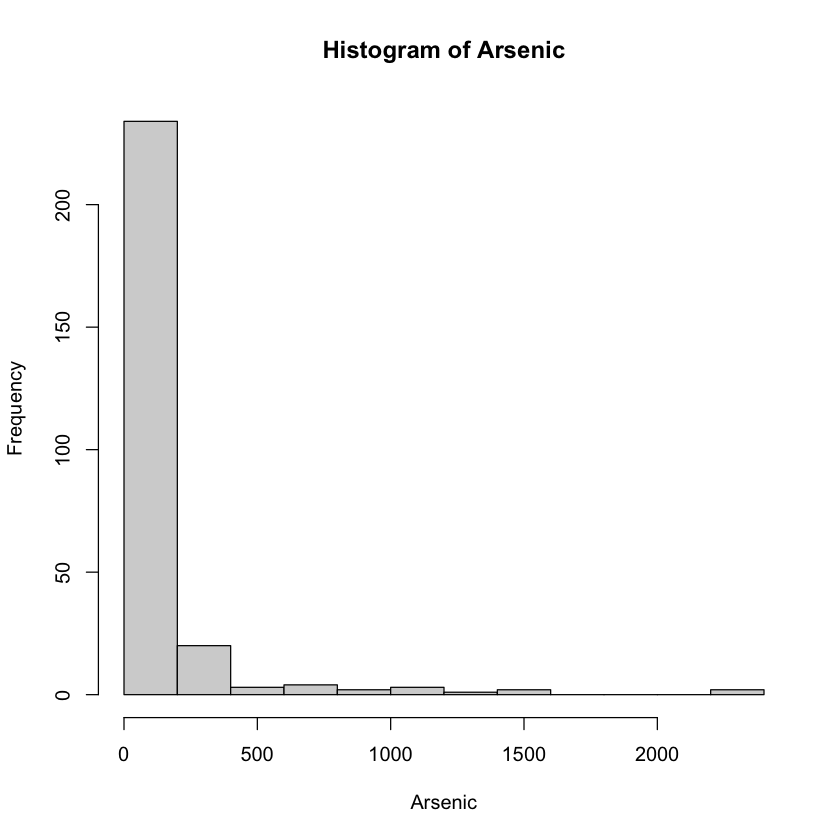

In [13]:
Bangladesh <- read.csv("Bangladesh.csv")

head(Bangladesh)

Arsenic <- Bangladesh$Arsenic
hist(Arsenic) #Arsenic levels in 271 wells in Bangladesh.
length(Arsenic)

b. The sample mean and standard deviation are mean=125.31 and sd=297.98, respetively (measured in micrograms per liter).

In [14]:
mean(Arsenic)
sd(Arsenic)

[1] 125.3199

[1] 297.9755

c. We draw resamples of size 271 with replacement from the data and compute the mean for each resample.

In [15]:
# bootstrap samples to estimate sample mean

n <- length(Arsenic)
N <- 10000

arsenic.mean <- numeric(N) 
for (i in 1:N)
{
  x <- sample(Arsenic, n, replace = TRUE)
  arsenic.mean[i] <- mean(x) #bootstrap sample mean
}

d. Let's plot the histogram and normal quantile plot of the bootstrap distribution. 

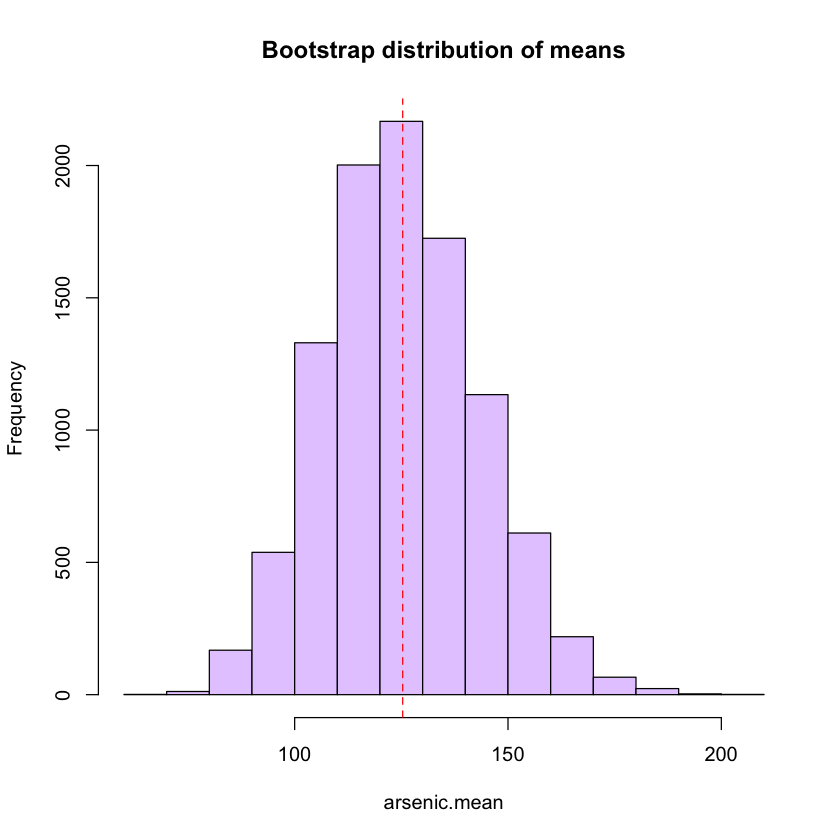

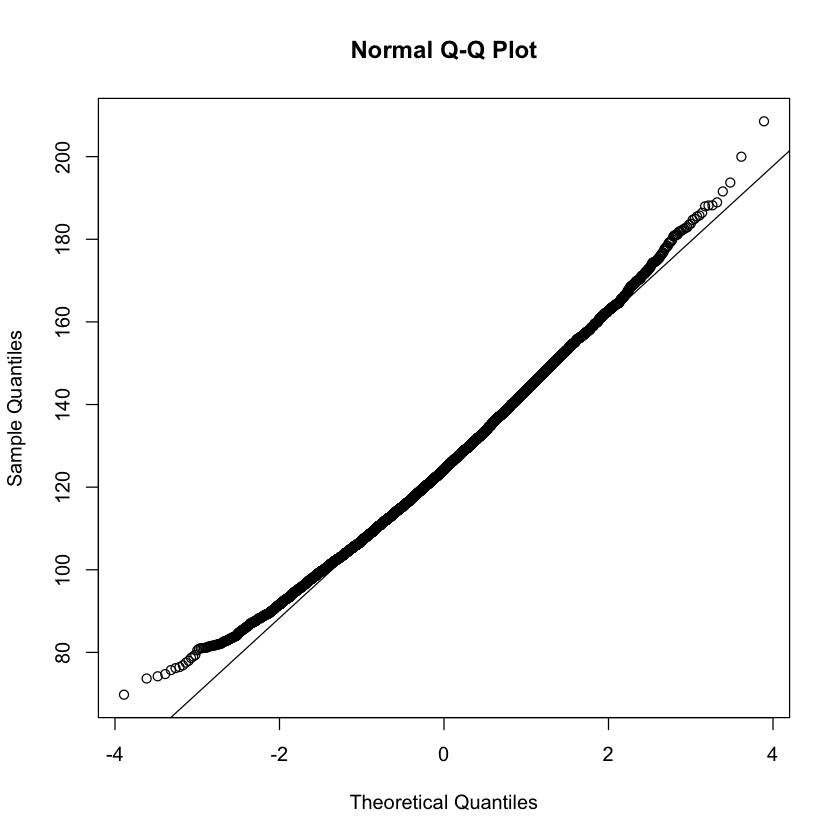

In [16]:
hist(arsenic.mean, main = "Bootstrap distribution of means",col = '#E5CCFF') 
abline(v = mean(Arsenic), col = "red", lty = 2) # observed mean 

qqnorm(arsenic.mean)
qqline(arsenic.mean)

The bootstrap distribution looks quite normal, with some skewness. This is the Central Limit Theorem (CLT) at work—when the sample size is large enough, the sampling distribution for the mean is approximately normal, even if the population is not normal.


e. Let's calculate the bootstrap mean,bias and std. error

In [17]:
(boot.mean= mean(arsenic.mean)) # bootstrap mean
(bias= mean(arsenic.mean)-mean(Arsenic)) # estimated bias
(boot.sd=sd(arsenic.mean)) # bootstrap SE

[1] 125.1644

[1] -0.1555756

[1] 17.96738

The mean of the bootstrap means is `r boot.mean`, quite close to the sample mean  (the difference is `r bias`. The bootstrap standard error is the standard deviation of the bootstrap distribution; in this case, the bootstrap standard error is `r boot.sd`.


#### OR


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Arsenic, statistic = mean.fn, R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1* 125.3199 -0.3058926    17.78515

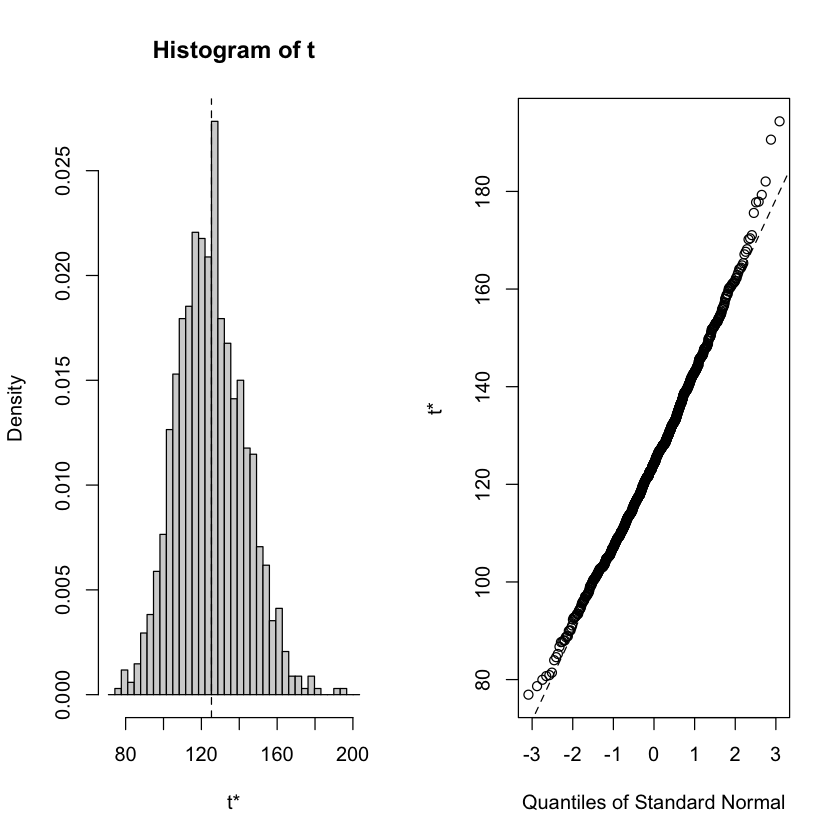

In [18]:
# Let's run the bootstrap
set.seed(1)
## but when you repeat it for many times, estimate get closer to the original
mean.fn=function(data,ind){mean(data[ind])}#specify the index

boot.out2= boot(Arsenic,mean.fn,R=1000) #repeat this 1000 times
boot.out2

plot(boot.out2) #symmetric distribution, looks like gaussian

f. Let's calculate the $95\%$ confidence Intervals.

For the normal distribution, we know that the 2.5 and 97.5 percentiles are at the mean plus or minus 1.96 standard deviations. 

In [19]:
(LL=boot.mean-1.96*boot.sd)
(UL=boot.mean+1.96*boot.sd)

(a=sum(arsenic.mean > UL)/N)
(b=sum(arsenic.mean < LL)/N)

[1] 89.94828

[1] 160.3804

[1] 0.03

[1] 0.0179

But for this particular bootstrap distribution, we find that `r a*100`% of the resample means are below the bootstrap mean minus 1.96SE, and `r b*100`% of the resample means are above the bootstrap mean plus 1.96SE. In this case, relying on the CLT would be inaccurate.

## g. BOOTSTRAP PERCENTILE INTERVALS

In [19]:
quantile(arsenic.mean, c(0.025, 0.975))

2.5%     97.5% 
 92.35348 162.00325

In the arsenic example, the $2.5\%$ and $97.5\%$ points of the bootstrap distribution give us the interval $(92.98, 162.20)$, so we are $95\%$ confident that the true mean arsenic level is between 92.98 and 162.20 micro gram per liter. Note that with true mean is 125.3782, this interval can be written 

In [20]:
92.98736-mean(arsenic.mean)
162.20634-mean(arsenic.mean)

[1] -32.17699

[1] 37.04199

$(\bar{x} - 32.39085, \bar{x}+ 36.82813)$ in particular, this interval is not symmetric about the mean, reflecting the asymmetry of the bootstrap distribution.

The arsenic data illustrate an interesting point. A good confidence interval for the mean need not necessarily be symmetric: an endpoint will be farther from the sample mean in the direction of any outliers. 

A confidence interval is an insurance policy: rather than relying on a single statistic, the sample mean, as an estimate of $\mu$, we give a range of plausible values for $\mu$. 

# BIAS

## Example 5

The maximum likelihood estimator for $\lambda$ is $\hat{\lambda}=\frac{1}{\bar{\chi}}$. We know that
$$
\mathcal{E}\left(X_i\right)=\frac{1}{\lambda} \Longrightarrow \mathcal{E}(\bar{X})=\frac{1}{\lambda} .
$$

But one can show that
$$
\mathcal{E}(\hat{\lambda})=\mathcal{E}\left(\frac{1}{\bar{X}}\right)=\frac{n}{n-1} \lambda .
$$

Can also assess and correct the bias with a simulation ("parametric bootstrap").

[1] 1.23024

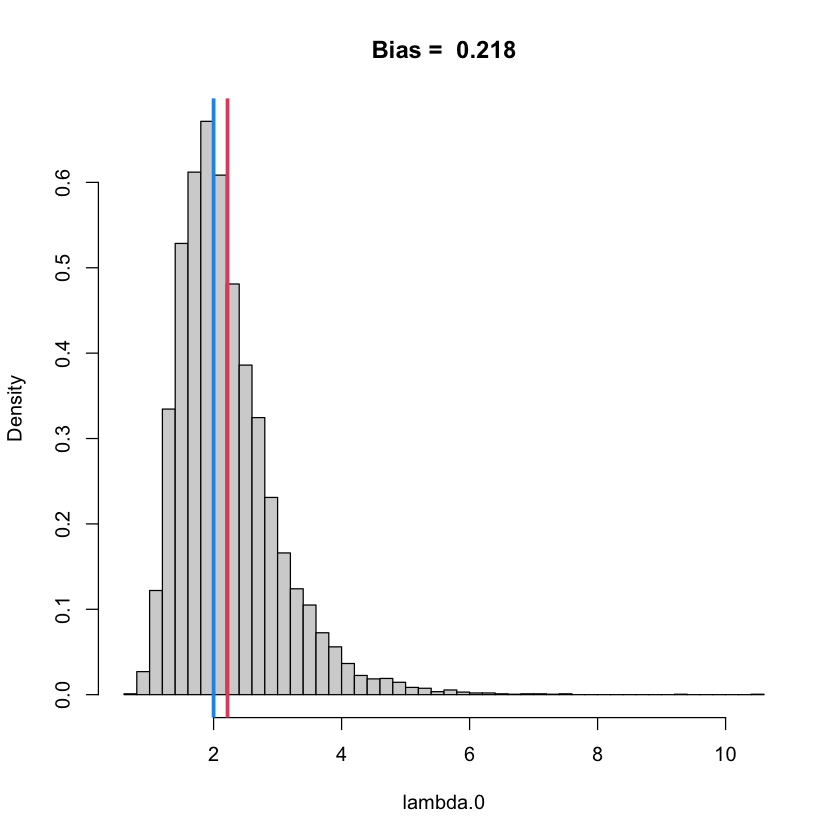

In [21]:
##### Demonstration of biased estimator  ####

lambda = 2
n = 10 # sample size

# make a sample and estimate lambda

x.1 <- rexp(n,lambda)

1/mean(x.1) # = lambda.hat = this is the estimate of means

# make many samples and make a histogram

# true lamba in blue
# mean of estimates in red
# positive bias

lambda.0 <- replicate(10000,1/mean(rexp(n,lambda)))

bias.0 = mean(lambda.0) - lambda

hist(lambda.0, breaks = 40,prob= T, main = paste("Bias = ", round(bias.0,3)))
abline(v = lambda, col = 4, lwd = 3)
abline(v = mean(lambda.0), col = 2, lwd = 3)

Assuming we don't have access to the population, we could re sample from the original sample x.1.

[1] 0.08892219

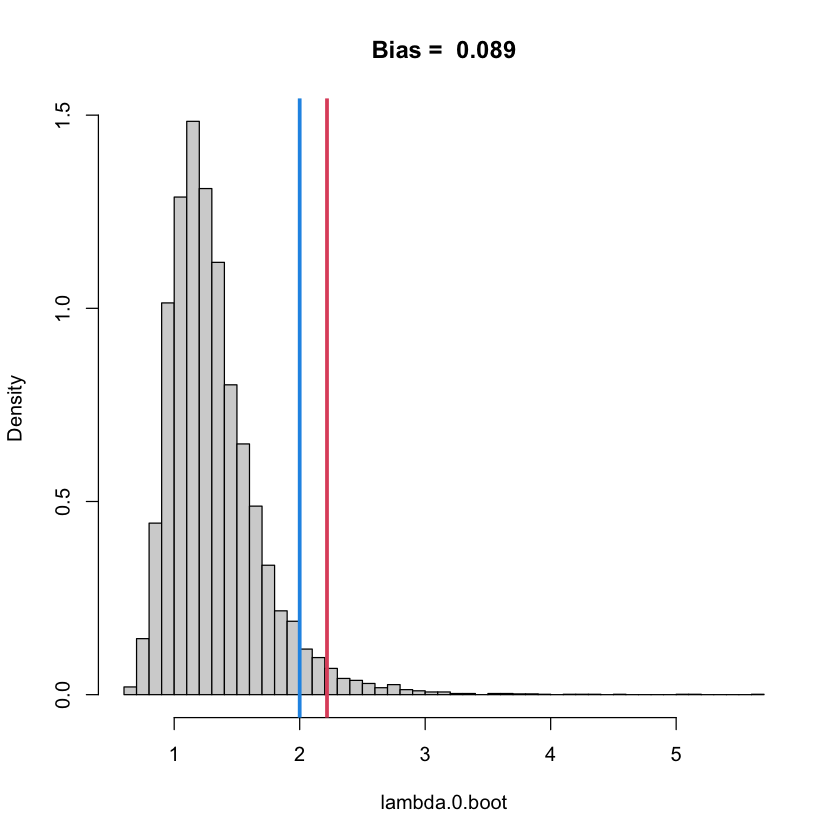

In [22]:
# Assess this bias with the bootstrap

lambda.0.boot <- replicate(10000, 1/mean(sample(x.1,n,replace = T))) 
#this is resampling = bootstrap

# Bias estimate

(bias.boot= mean(lambda.0.boot) - 1/mean(x.1))

hist(lambda.0.boot,breaks = 40,prob= T, main = paste("Bias = ", round(bias.boot,3)))
abline(v = lambda, col = 4, lwd = 3)
abline(v = mean(lambda.0), col = 2, lwd = 3)

Compare

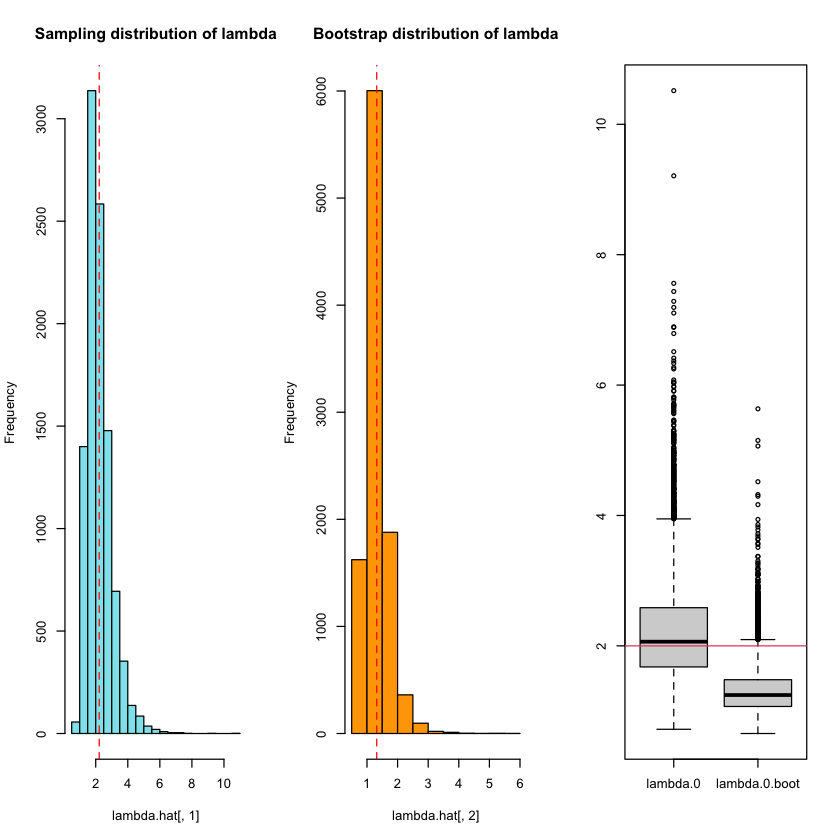

In [23]:
par(mfrow=c(1,3))

lambda.hat <- data.frame(lambda.0,lambda.0.boot)

hist(lambda.hat[,1], main = "Sampling distribution of lambda", col="cadetblue2") 
abline(v = mean(lambda.hat[,1]), col = "red", lty = 2)

hist(lambda.hat[,2], main = "Bootstrap distribution of lambda", col="orange") 
abline(v = mean(lambda.hat[,2]), col = "red", lty = 2)

boxplot(lambda.hat )
abline(h=lambda,col=2)

Correct the estimate by substracting the estimated bias from the original estimate.

In [24]:
1/mean(x.1) - bias.boot # original mean estimate - bias

### closer to the original lambda=2

[1] 1.141318

# Two sample Bootstrap

## Example 4

A high school student was curious about the total number of minutes devoted to commercials during any given half-hour time period on basic and extended cable TV channels (Rodgers and Robinson (2004)). 

In [25]:
TV = read.csv("TV.csv")
head(TV)

times.Basic <- TV$Times[TV$Cable == "Basic"]
#times.Basic <- subset(TV, select = Times,subset = Cable == "Basic", drop = T)


times.Ext <- TV$Times[TV$Cable == "Extended"]
#times.Ext <- subset(TV, select = Times,subset = Cable == "Extended", drop = T)

times.Basic
times.Ext

,ID,Times,Cable
,<int>,<dbl>,<chr>
1,1,7.0,Basic
2,2,10.0,Basic
3,3,10.6,Basic
4,4,10.2,Basic
5,5,8.6,Basic
6,6,7.6,Basic


[1]  7.0 10.0 10.6 10.2  8.6  7.6  8.2 10.4 11.0  8.5

[1] 3.4 7.8 9.4 4.7 5.4 7.6 5.0 8.0 7.8 9.6

The means of the basic and extended channel commercial times are 9.21 and 6.87 min, respectively, so on average, commercials on basic channels are 2.34 min longer than on extended channels. Is this difference of 2.34 min statistically significant? The poor student could only stand to watch 10 h of random TV, so his observations may not accurately represent the TV universe.

In [26]:
mean(times.Basic)
mean(times.Ext)

mean(times.Basic)-mean(times.Ext)

table(TV$Cable)

[1] 9.21

[1] 6.87

[1] 2.34


   Basic Extended 
      10       10 

The original data are simple random samples of size 10 from two populations. 

We draw a bootstrap sample from the basic channel data and independently draw a bootstrap sample from the extended channel data, compute the means for each sample, and take the difference.

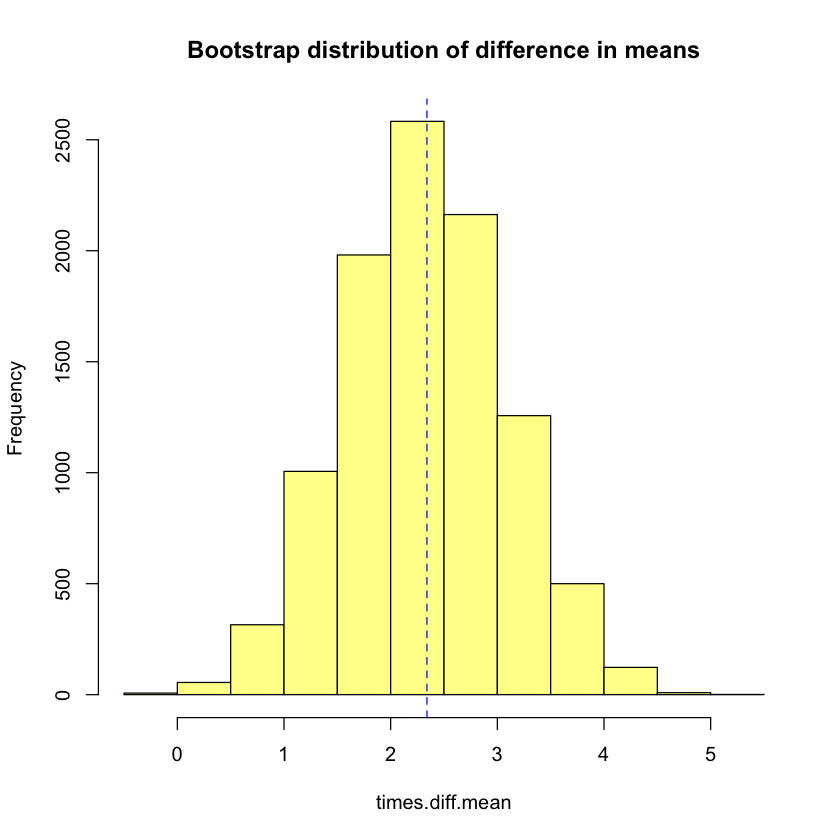

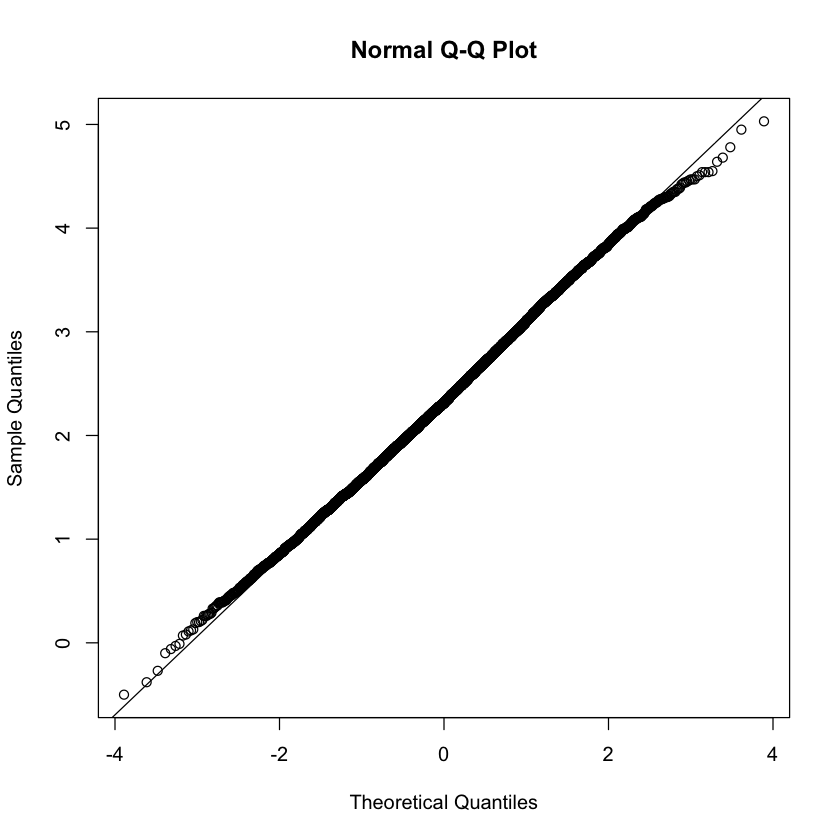

In [27]:
N <- 10000
times.diff.mean <- numeric(N) 

for (i in 1:N)
{
Basic.sample <- sample(times.Basic, 10, replace = TRUE) 
Ext.sample <- sample(times.Ext, 10, replace = TRUE)
times.diff.mean[i] <- mean(Basic.sample) - mean(Ext.sample)
}

hist(times.diff.mean,main = "Bootstrap distribution of difference in means",col = '#FFFF99')
abline(v = mean(times.Basic) - mean(times.Ext), col = "blue", lty = 2)

qqnorm(times.diff.mean)
qqline(times.diff.mean)

This displays the bootstrap distribution of the difference of sample means. As in the single-sample case, we see that the bootstrap distribution is approximately normal and centered at the original statistic (the difference in sample means). 

We also get a quick idea of how much the difference in sample means varies due to random sampling. We may quantify this variation by computing the bootstrap standard error, which is 0.76. _Again, the bootstrap standard error is the standard error of the sampling distribution._

In [28]:
mean(times.Basic) - mean(times.Ext) #original smaple
mean(times.diff.mean) #bootstrap sample
sd(times.diff.mean)

# 95% CI
quantile(times.diff.mean, c(0.025, 0.975))
mean(times.diff.mean) - (mean(times.Basic) - mean(times.Ext)) # bias

[1] 2.34

[1] 2.333684

[1] 0.752676

2.5% 97.5% 
 0.88  3.81

[1] -0.006316

The $95\%$ bootstrap percentile confidence interval for the difference in means (basic- extended) is (0.89, 3.80). Thus, we are $95\%$ confident that commercial times on basic channels are, on average, between 0.89 and 3.80 min longer than on extended channels (per half-hour time periods).



# Hypothesis testing using bootstrap approach.
(Chihara2011)

## Example 6

Verizon is the primary local telephone company (incumbent local exchange carrier, ILEC) for a large area of the eastern United States. As such, it is responsible for providing repair service for the customers of other telephone companies known as competing local exchange carriers (CLECs) in this region. Verizon is subject to fines if the repair times (the time it takes to fix a problem) for CLEC customers are sub- stantially worse than those for Verizon customers.

The data set Verizon contains a random sample of repair times for 1664 ILEC and 23 CLEC customers. The mean repair time for ILEC customers is 8.4 hours, while that for CLEC customers is 16.5 h. 

_Could a difference this large be easily explained by chance? Or is there another reason?_


In [29]:
Verizon = read.csv("Verizon.csv")
head(Verizon)
tapply(Verizon$Time, Verizon$Group, mean)

,Time,Group
,<dbl>,<chr>
1,17.50,ILEC
2,2.40,ILEC
3,0.00,ILEC
4,0.65,ILEC
5,22.23,ILEC
6,1.20,ILEC


CLEC      ILEC 
16.509130  8.411611

Let's make a hypothesis. Are two population means different?

_Null Hypothesis: The diffference of the means are equal to 0. (That means that there is no difference between the two population means - that means there is no discriminating)_

Let's use the bootstrap approach.

a. First let's seperate the two sampples "CLEC" and "ILEC".

In [30]:
verizon.clec <- Verizon$Time[Verizon$Group == "CLEC"]
verizon.ilec <- Verizon$Time[Verizon$Group == "ILEC"]

b. Make many bootstrap samples(1000) of sample means for each group. Record the differences in another variable. What is the average of the differences? Compare this with the actual mean difference.

In [31]:
z.1 <- rep(NA,10000)

for (j in 1:10000){
  boot.ilec <- mean(sample(verizon.ilec, length(verizon.ilec), replace = T))
  boot.clec <- mean(sample(verizon.clec, length(verizon.clec), replace = T))
  z.1[j] <- boot.ilec - boot.clec #the difference
}

mean(z.1) #bootstrap mean difference

mydiff = function(mydf){
  index = mydf$Group == "ILEC"
  return(mean(mydf$Time[index]) - mean(mydf$Time[!index]))
}

mydiff(Verizon) #actual mean difference from the original sample

[1] -8.091132

[1] -8.09752

The mean of the bootstrap distribution is close to the actual difference of means.

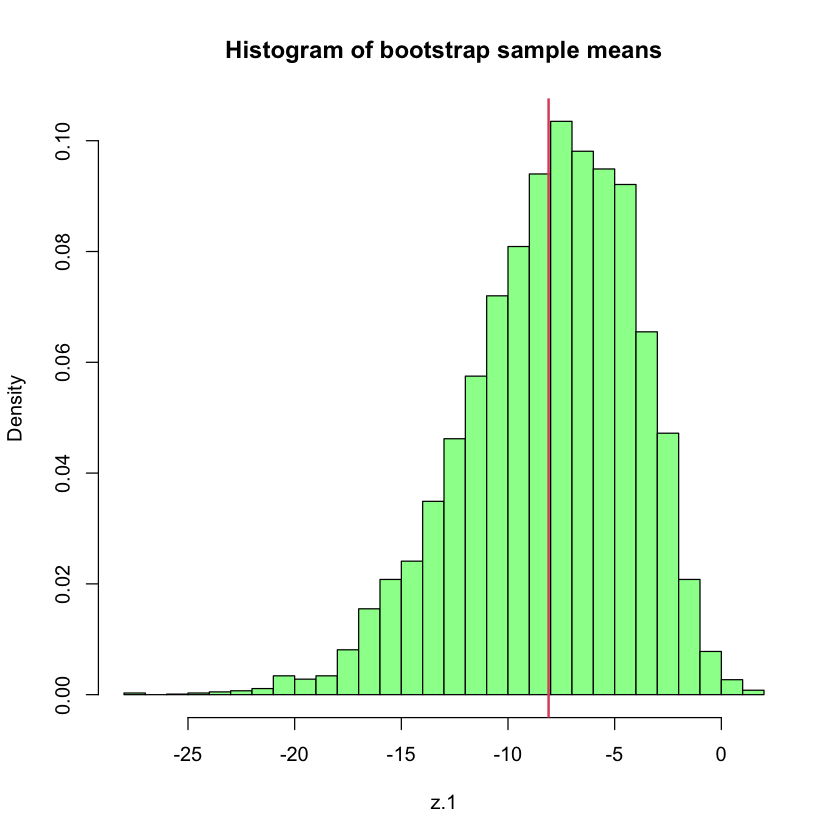

In [32]:
hist(z.1, breaks = 40, prob = T, main = "Histogram of bootstrap sample means",col = '#99FF99')
abline(v = mydiff(Verizon), col = 2, lwd = 2)

c. Make a 95% percentile confidence interval for the difference estimate. 

Let's make a hypothesis. Are two population means different?

Null Hypothesis: The diffference of the means are equal to 0. (That means that there is no difference between the two population means - that means there is no discriminating)

2.5%      97.5% 
-16.726885  -1.748643

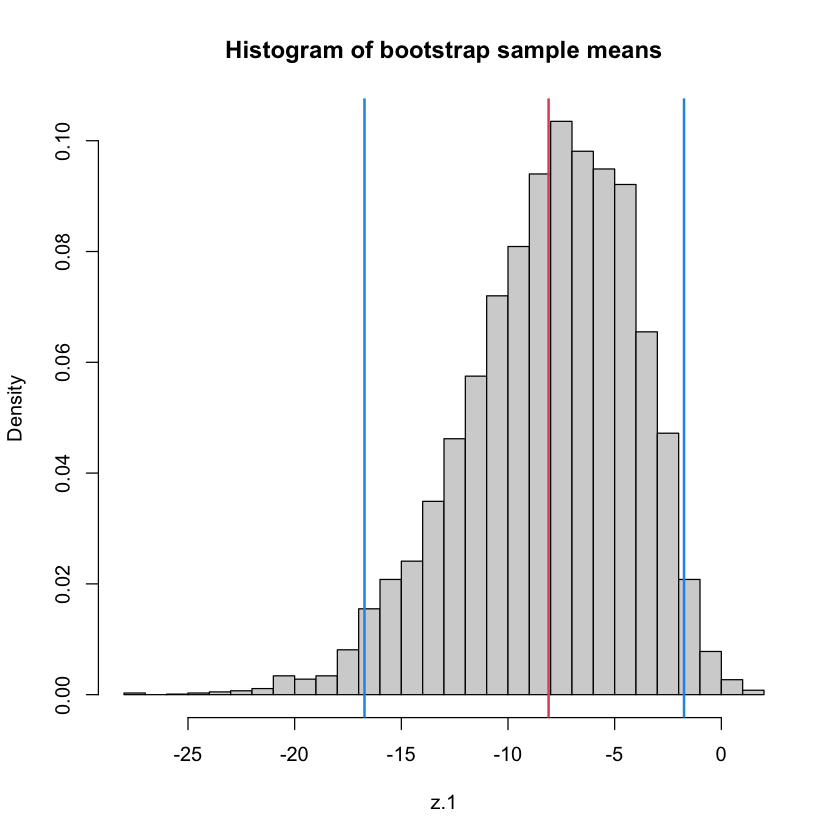

In [33]:
ci.1 <- quantile(z.1, c(.025, .975))
ci.1 #null value is not inside the confidence intervel = reject the null hyp.

hist(z.1, breaks = 40, prob = T, main = "Histogram of bootstrap sample means")
abline(v = mydiff(Verizon), col = 2, lwd = 2)
abline(v = ci.1, col = 4, lwd = 2)

CI does not contain 0. True difference is likely to be negative.

That means we reject the null hypothesis at 5% significance level. That means that this is not due to chance, but also may be due to some discrimination among their own customers and customers from the competing companies.